In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns  # For loading the dataset
from sklearn.preprocessing import MinMaxScaler  # For normalizing data
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import setuptools.dist
from keras.src.models.sequential import Sequential
from keras.src.layers.core.dense import Dense
from keras.src.layers.rnn.lstm import LSTM
# from keras.models import Sequential  # For creating the LSTM model
# from keras.layers import LSTM, Dense  # For adding LSTM and Dense layers
import matplotlib.pyplot as plt  # For plotting the results


In [28]:
# Load the 'tips' dataset from seaborn
data = sns.load_dataset('tips')
print(data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [29]:
# Take the 'total_bill' column as a pseudo-stock price for the demo
prices = data['total_bill'].values.reshape(-1,1)  # Reshape to a 2D array for scaling

print("Prices : \n", prices)

Prices : 
 [[16.99]
 [10.34]
 [21.01]
 [23.68]
 [24.59]
 [25.29]
 [ 8.77]
 [26.88]
 [15.04]
 [14.78]
 [10.27]
 [35.26]
 [15.42]
 [18.43]
 [14.83]
 [21.58]
 [10.33]
 [16.29]
 [16.97]
 [20.65]
 [17.92]
 [20.29]
 [15.77]
 [39.42]
 [19.82]
 [17.81]
 [13.37]
 [12.69]
 [21.7 ]
 [19.65]
 [ 9.55]
 [18.35]
 [15.06]
 [20.69]
 [17.78]
 [24.06]
 [16.31]
 [16.93]
 [18.69]
 [31.27]
 [16.04]
 [17.46]
 [13.94]
 [ 9.68]
 [30.4 ]
 [18.29]
 [22.23]
 [32.4 ]
 [28.55]
 [18.04]
 [12.54]
 [10.29]
 [34.81]
 [ 9.94]
 [25.56]
 [19.49]
 [38.01]
 [26.41]
 [11.24]
 [48.27]
 [20.29]
 [13.81]
 [11.02]
 [18.29]
 [17.59]
 [20.08]
 [16.45]
 [ 3.07]
 [20.23]
 [15.01]
 [12.02]
 [17.07]
 [26.86]
 [25.28]
 [14.73]
 [10.51]
 [17.92]
 [27.2 ]
 [22.76]
 [17.29]
 [19.44]
 [16.66]
 [10.07]
 [32.68]
 [15.98]
 [34.83]
 [13.03]
 [18.28]
 [24.71]
 [21.16]
 [28.97]
 [22.49]
 [ 5.75]
 [16.32]
 [22.75]
 [40.17]
 [27.28]
 [12.03]
 [21.01]
 [12.46]
 [11.35]
 [15.38]
 [44.3 ]
 [22.42]
 [20.92]
 [15.36]
 [20.49]
 [25.21]
 [18.24]
 [14.31]

In [31]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(prices)  # Scale data between 0 and 1

print("Scaled Data : \n",scaled_data)

Scaled Data : 
 [[0.29157939]
 [0.1522832 ]
 [0.3757855 ]
 [0.43171345]
 [0.45077503]
 [0.46543779]
 [0.11939673]
 [0.49874319]
 [0.25073314]
 [0.24528697]
 [0.15081693]
 [0.67427734]
 [0.25869292]
 [0.32174277]
 [0.24633431]
 [0.38772518]
 [0.15207373]
 [0.27691663]
 [0.29116045]
 [0.36824466]
 [0.31105991]
 [0.36070381]
 [0.2660243 ]
 [0.761416  ]
 [0.35085882]
 [0.30875576]
 [0.21575199]
 [0.20150817]
 [0.39023879]
 [0.34729786]
 [0.13573523]
 [0.32006703]
 [0.25115207]
 [0.36908253]
 [0.30812736]
 [0.43967323]
 [0.27733557]
 [0.29032258]
 [0.32718894]
 [0.59069962]
 [0.27167993]
 [0.30142438]
 [0.22769166]
 [0.13845832]
 [0.57247591]
 [0.31881022]
 [0.40134059]
 [0.6143695 ]
 [0.53372434]
 [0.31357352]
 [0.19836615]
 [0.15123586]
 [0.66485128]
 [0.14390448]
 [0.47109342]
 [0.34394638]
 [0.73188102]
 [0.4888982 ]
 [0.17113532]
 [0.94679514]
 [0.36070381]
 [0.22496858]
 [0.16652702]
 [0.31881022]
 [0.30414747]
 [0.35630499]
 [0.28026812]
 [0.        ]
 [0.359447  ]
 [0.25010473]
 [0.

In [32]:
df = pd.DataFrame(prices)
print(df.head(5))

       0
0  16.99
1  10.34
2  21.01
3  23.68
4  24.59


In [41]:
# Create the training data by taking past 'time_step' values to predict the next one
train_data = []
target_data = []
time_step = 10  # Using past 10 values to predict the next one


# Loop through the scaled data and prepare input-output sequences
for i in range(time_step, len(scaled_data)):
    train_data.append(scaled_data[i-time_step:i, 0])  # Last 10 days
    target_data.append(scaled_data[i, 0])  # Next day (target)

train_data, target_data = np.array(train_data), np.array(target_data)
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))  # Reshape for LSTM input

print("Train Data : \n", train_data)
print("Target Data : \n", target_data)

Train Data : 
 [[[0.29157939]
  [0.1522832 ]
  [0.3757855 ]
  ...
  [0.49874319]
  [0.25073314]
  [0.24528697]]

 [[0.1522832 ]
  [0.3757855 ]
  [0.43171345]
  ...
  [0.25073314]
  [0.24528697]
  [0.15081693]]

 [[0.3757855 ]
  [0.43171345]
  [0.45077503]
  ...
  [0.24528697]
  [0.15081693]
  [0.67427734]]

 ...

 [[0.26434855]
  [0.17888563]
  [0.16129032]
  ...
  [0.68621701]
  [0.5437788 ]
  [0.50502723]]

 [[0.17888563]
  [0.16129032]
  [0.26099707]
  ...
  [0.5437788 ]
  [0.50502723]
  [0.41055718]]

 [[0.16129032]
  [0.26099707]
  [0.14662757]
  ...
  [0.50502723]
  [0.41055718]
  [0.30896523]]]
Target Data : 
 [0.15081693 0.67427734 0.25869292 0.32174277 0.24633431 0.38772518
 0.15207373 0.27691663 0.29116045 0.36824466 0.31105991 0.36070381
 0.2660243  0.761416   0.35085882 0.30875576 0.21575199 0.20150817
 0.39023879 0.34729786 0.13573523 0.32006703 0.25115207 0.36908253
 0.30812736 0.43967323 0.27733557 0.29032258 0.32718894 0.59069962
 0.27167993 0.30142438 0.22769166 0.1384

In [53]:
# Build the LSTM model
model = Sequential()

# Add the first LSTM layer with 50 units (neurons) and return sequences to feed into the next LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))

# Add another LSTM layer without returning sequences
model.add(LSTM(units=50))

# Add a Dense output layer with 1 unit (for predicting the next value)
model.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')


d:\Softwares\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
# Train the model for 10 epochs with a batch size of 32
model.fit(train_data, target_data, epochs=10, batch_size=32)

# Predict the future values based on training data
predicted_prices = model.predict(train_data)

print("Predicted prices : \n",predicted_prices)

# Inverse transform the predicted prices to the original scale
predicted_prices = scaler.inverse_transform(predicted_prices)

print("Inversed Predicted prices : \n",predicted_prices)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(target_data, predicted_prices)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(target_data, predicted_prices)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1319
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0406 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0390 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0395 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0342 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0391 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0323 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0336 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted prices : 
 [[0.355625  ]
 [0.34997794]
 [0.36067468]
 [0.35975215]
 [0.35658273]
 [0.35064203]
 [0.34711304]
 [0.34943023]
 [0.3400521 ]
 [0.33967623]
 [0.34193507]
 [0.34685618]
 [0.33681524]
 [0.33887988]
 [0.35128886]
 [0.36174214]
 [0.36366084]
 [0.36779052]
 [0.36404958]
 [0.3630397 ]
 [0.36049068]
 [0.354

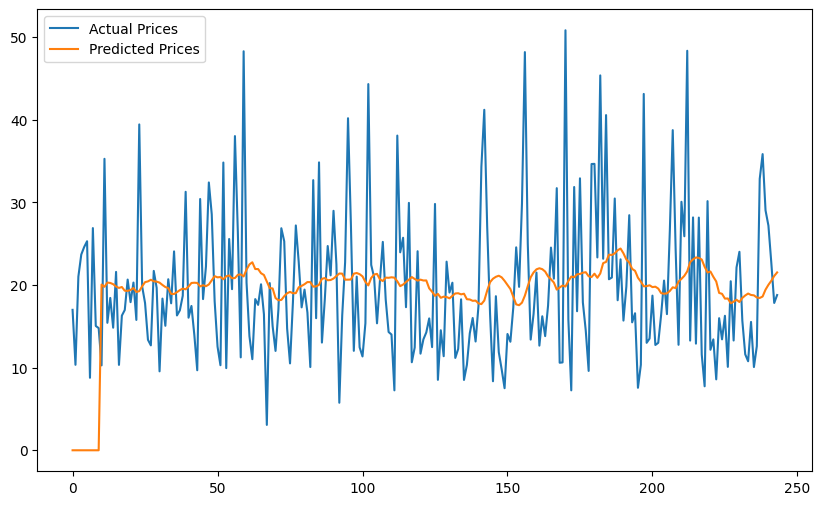

In [55]:
plt.figure(figsize=(10,6))
plt.plot(prices, label='Actual Prices')  # Plot actual values
plt.plot(np.concatenate([np.zeros(time_step), predicted_prices.flatten()]), label='Predicted Prices')  # Plot predicted values
plt.legend()
# plt.savefig('Deep_Learning/DL_Plots/LSTM_Plot.jpg')
plt.show()